# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

# **Índice**
>1. Exploración de datos
>2. Normalización de texto
>3. Preparación de datos para modelos de aprendizaje
>4. Modelos de prediccón
>5. Conclusiones
>6. Continuación de NLP con nuevas librerías

## **1. Exploración de datos**

### Importamos las librerias

In [2]:
import itertools
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

### Carga de datos

In [2]:
dev = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP\dataset_es_dev.json', lines=True)
test = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP\dataset_es_test.json', lines=True)
train = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP\dataset_es_train.json', lines=True)

### Definiendo nuevas variables para analizar el texto - Largo del texto

In [3]:
def text_length (df):
    df['text_length'] = df['review_body'].apply(len)

In [4]:
lista_df = [dev,test,train]
for i in lista_df:
    text_length(i)

### Signos de exclamación

Asumo que la gente solo pone el signo de exclamación de cierre, y en el caso de que use los dos, debería poder contabilizarse como los que ponen uno solo, porque sino tendrían el doble de elementos contados.

### Inspección de datos
Vemos como están conformados los datos, qué información contienen y cómo podemos interpretarlos.

In [5]:
dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,68
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,41
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,170
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,308
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,42


In [6]:
test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless,104
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home,37
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy,232
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home,473
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase,229


In [7]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,94
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,140
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,332
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,36


In [8]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
 8   text_length       5000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
 8   text_length       5000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
 8   text_length       200000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 13.7+ MB


### Verifición de datos faltantes

In [11]:
print(f"Numbers of missing label = {train.isnull().sum()}")
print(f"Numbers of missing msg = {test.isnull().sum()}")
print(f"Numbers of missing msg = {dev.isnull().sum()}")



Numbers of missing label = review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
text_length         0
dtype: int64
Numbers of missing msg = review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
text_length         0
dtype: int64
Numbers of missing msg = review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
text_length         0
dtype: int64


In [12]:
dev.describe()

,stars,text_length
count,5000.000000,5000.000000
mean,3.000000,150.233400
std,1.414355,127.577135
min,1.000000,19.000000
25%,2.000000,70.000000
50%,3.000000,121.000000
75%,4.000000,187.000000
max,5.000000,1576.000000


In [13]:
test.describe()

,stars,text_length
count,5000.000000,5000.000000
mean,3.000000,151.914200
std,1.414355,132.470068
min,1.000000,20.000000
25%,2.000000,69.000000
50%,3.000000,122.000000
75%,4.000000,186.000000
max,5.000000,1789.000000


In [14]:
train.describe()

,stars,text_length
count,200000.000000,200000.000000
mean,3.000000,151.302910
std,1.414217,132.201785
min,1.000000,16.000000
25%,2.000000,68.000000
50%,3.000000,120.000000
75%,4.000000,186.000000
max,5.000000,3086.000000


### ¿Cuál es el promedio de estrellas de las diferentes categorías?

In [15]:
train.groupby('product_category')['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,5737.0,2.866829,1.387221,1.0,2.0,3.0,4.0,5.0
automotive,7143.0,2.950721,1.406303,1.0,2.0,3.0,4.0,5.0
baby_product,4881.0,3.089326,1.385600,1.0,2.0,3.0,4.0,5.0
beauty,7337.0,2.935805,1.414347,1.0,2.0,3.0,4.0,5.0
book,5264.0,3.399316,1.393413,1.0,2.0,4.0,5.0,5.0
camera,3029.0,3.109277,1.398578,1.0,2.0,3.0,4.0,5.0
digital_ebook_purchase,1843.0,3.357027,1.282784,1.0,2.0,3.0,4.0,5.0
drugstore,5513.0,3.010521,1.430628,1.0,2.0,3.0,4.0,5.0
electronics,10385.0,2.887626,1.434022,1.0,2.0,3.0,4.0,5.0


<AxesSubplot:xlabel='product_category', ylabel='stars'>

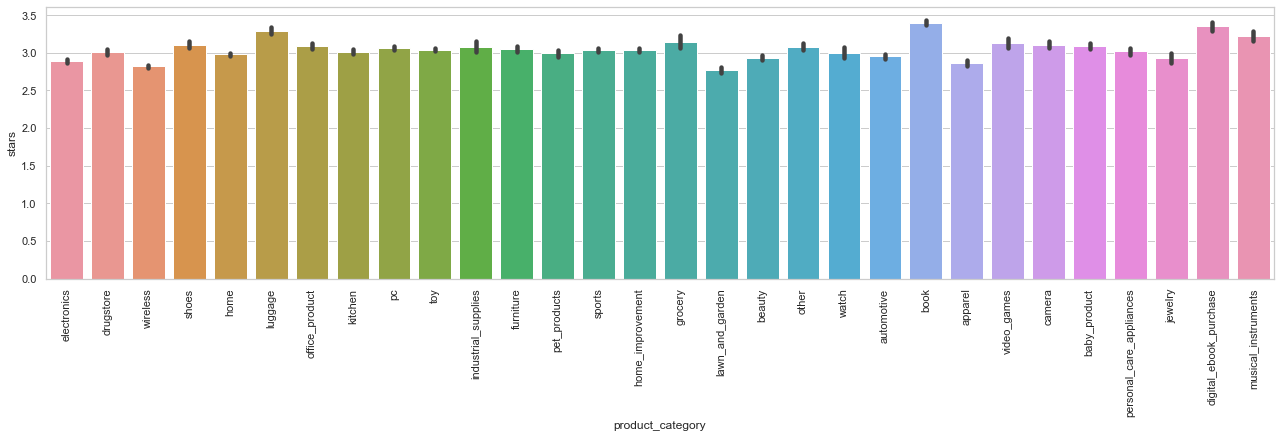

In [16]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(data = train, x = 'product_category', y = 'stars')

La distribución de estrellas se encuentra bastante balanceada a través de las categorías.

### ¿Cuál es el promedio de cantidad de texto según la categoría?

In [17]:
train.groupby('product_category')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,5737.0,124.834060,96.628267,17.0,61.00,109.0,153.0,1462.0
automotive,7143.0,137.067199,119.151216,20.0,60.00,110.0,169.0,1385.0
baby_product,4881.0,152.572014,121.168878,19.0,74.00,123.0,195.0,1954.0
beauty,7337.0,144.975467,123.298466,19.0,67.00,117.0,179.0,1981.0
book,5264.0,137.806801,116.898618,19.0,59.00,114.0,172.0,1714.0
camera,3029.0,180.597227,154.522068,20.0,82.00,137.0,224.0,1587.0
digital_ebook_purchase,1843.0,164.441671,122.192908,19.0,93.00,137.0,203.0,1161.0
drugstore,5513.0,143.368583,121.427461,20.0,64.00,116.0,178.0,1971.0
electronics,10385.0,169.193548,153.586144,19.0,75.00,128.0,207.0,2356.0


<AxesSubplot:xlabel='product_category', ylabel='text_length'>

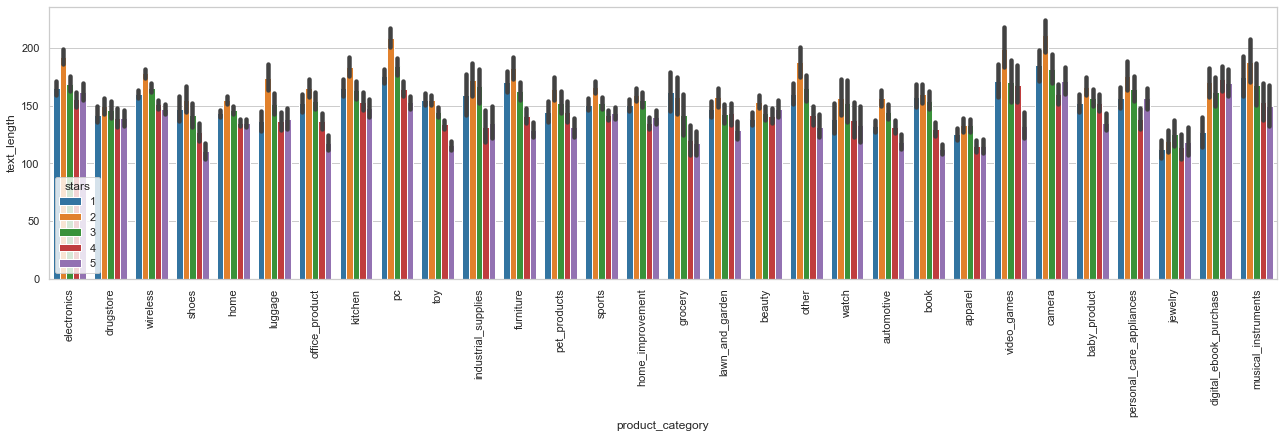

In [18]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(data = train, x = 'product_category', y = 'text_length', hue = 'stars')

El promedio se mantiene constante entre las categorías, pero la desviación estandar es muy alta para todos, lo que significa que tenemos mucha variabilidad en la cantidad de texto. Por otra parte, el gráfico parece indicar que la gente escribe más cuando puntúa con 2 estrellas, repitiendose la misma tendencia en todas las categorías. Ocurre lo opuesto cuando la opinión sobre el producto es muy buena y se le asigna 5 estrellas.

### Visualización de datos - Largo de texto

<AxesSubplot:title={'center':'Dev set'}, xlabel='text_length', ylabel='Count'>

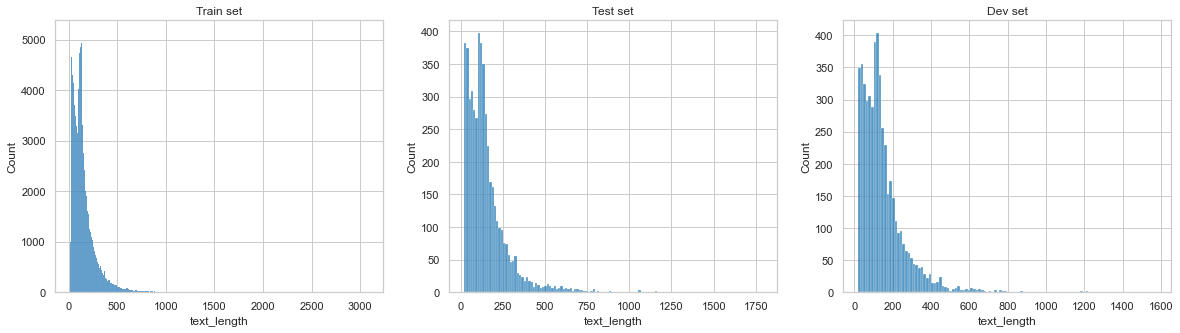

In [19]:
f = plt.figure(figsize=(20,5))

ax = f.add_subplot(131)
ax.set_title("Train set")
sns.histplot(train.text_length, ax=ax)
ax1 = f.add_subplot(132)
ax1.set_title("Test set")
sns.histplot(test.text_length, ax=ax1)
ax2 = f.add_subplot(133)
ax2.set_title("Dev set")
sns.histplot(dev.text_length, ax=ax2)

### ¿Hay alguna relación entre el largo de texto y la cantidad de estrellas?

(0.0, 1000.0)

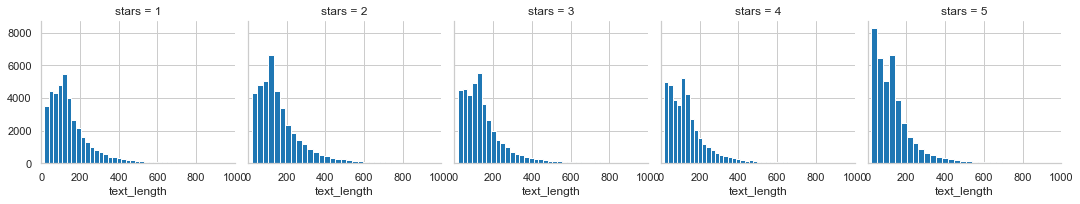

In [20]:
g = sns.FacetGrid(train, col = 'stars')
g.map(plt.hist,'text_length', bins = 100)
plt.xlim(0,1000)

Volvemos a notar que la gente suele escribir menos cuando se trata de un excelente producto

<AxesSubplot:xlabel='stars', ylabel='text_length'>

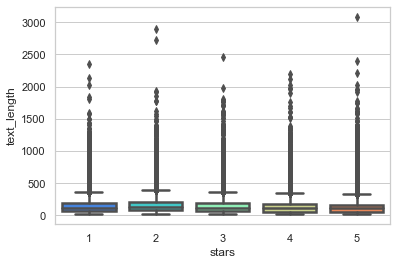

In [21]:
sns.boxplot(x = 'stars', y = 'text_length', data = train, palette = 'rainbow')

### Distribución de reseñas por estrellas

<AxesSubplot:xlabel='stars', ylabel='count'>

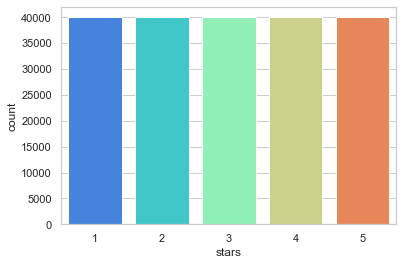

In [22]:
sns.countplot(x = 'stars', data = train, palette = 'rainbow')

La distribución de reseñas se encuentra balanceada e igual representada para todas las estrellas. Esto se repite para todos los datasets.

### Cantidad de reseñas por comprador
Vamos a ver si hay algún dato útil o anomalía en la gente que compró mucho

In [23]:
top_reviewers = train['reviewer_id'].value_counts().reset_index(name = 'frequency')
top_reviewers.rename(columns = {'index' : 'reviewer_id'}, inplace=True)
top_reviewers

,reviewer_id,frequency
0,reviewer_es_0437514,7
1,reviewer_es_0588051,7
2,reviewer_es_0431022,7
3,reviewer_es_0659252,6
4,reviewer_es_0035822,6
...,...,...
179071,reviewer_es_0937850,1
179072,reviewer_es_0228928,1
179073,reviewer_es_0730271,1
179074,reviewer_es_0704394,1


In [24]:
train[train['reviewer_id'] == 'reviewer_es_0431022']

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length
9219,es_0555103,product_es_0633037,reviewer_es_0431022,1,"Mala elección, talla super pequeño, no lo devo...",no me gusto nada,es,apparel,116
15119,es_0043301,product_es_0918078,reviewer_es_0431022,1,"Lo tuve que devolver, se veía muy endeble y no...",endeble,es,electronics,90
72673,es_0364344,product_es_0065839,reviewer_es_0431022,2,"Se rompió a la primera caída, creo q no son mu...",No lo recomiendo,es,wireless,81
94225,es_0969476,product_es_0466804,reviewer_es_0431022,3,"Colores bonitos, tacto agradable, es suficient...",buena compra,es,apparel,218
154303,es_0419561,product_es_0159509,reviewer_es_0431022,4,"A mi hija le encanto, viene el hada con el cie...",muy bonita,es,toy,102
168351,es_0547249,product_es_0226318,reviewer_es_0431022,5,"Preciosa, de acabados buenos, cose de maravill...",Amor puro,es,home,162
169020,es_0279159,product_es_0499936,reviewer_es_0431022,5,"Resistente, bonita, de buena calidad la recomi...",Muy buena,es,wireless,50


<AxesSubplot:xlabel='frequency', ylabel='count'>

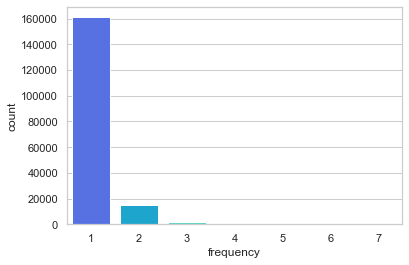

In [25]:
sns.countplot(x = 'frequency', data = top_reviewers, palette = 'rainbow')

### Cantidad de reseñas por producto
Veremos si hay productos que tuvieron más reseñas que otros

In [26]:
top_products = train['product_id'].value_counts().reset_index(name = 'frequency')
top_products.rename(columns = {'index' : 'product_id'}, inplace=True)
top_products

,product_id,frequency
0,product_es_0261843,8
1,product_es_0086672,7
2,product_es_0523350,7
3,product_es_0393632,7
4,product_es_0801630,7
...,...,...
150933,product_es_0329061,1
150934,product_es_0545514,1
150935,product_es_0793867,1
150936,product_es_0549553,1


In [27]:
train[train['product_id'] == 'product_es_0261843']

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length
11612,es_0233364,product_es_0261843,reviewer_es_0855637,1,No son las canicas de la foto. Son pequeñas y ...,Decepcion,es,toy,66
27746,es_0015129,product_es_0261843,reviewer_es_0782745,1,"El producto aún no ha llegado, tenía que llega...",Estafa,es,toy,111
38929,es_0900151,product_es_0261843,reviewer_es_0634470,1,"Una pena, las canicas son muy cutres, lo único...",Canicas todo a 100,es,toy,67
67287,es_0953681,product_es_0261843,reviewer_es_0978294,2,Son caras y vienen muchas repetidas y ROTAS. L...,Rotas representante y caras. Vete al chino que...,es,toy,115
95799,es_0529308,product_es_0261843,reviewer_es_0981219,3,"Han venido unas pocas rotas, como son tantas n...",Algunas rotas,es,toy,115
124428,es_0101224,product_es_0261843,reviewer_es_0948003,4,Ha sido un regalo para un niño de 6 años y le ...,Bueno,es,toy,54
136414,es_0582312,product_es_0261843,reviewer_es_0000856,4,Buen producto...pero se ve que se había caído ...,Un juguete retro muy logrado.,es,toy,151
156144,es_0361862,product_es_0261843,reviewer_es_0978422,4,Excelente producto. Ideal para regalo a los má...,Excelente presentación,es,toy,89


<AxesSubplot:xlabel='frequency', ylabel='count'>

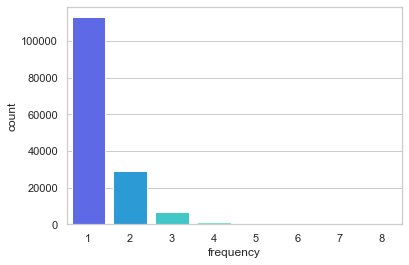

In [28]:
sns.countplot(x = 'frequency', data = top_products, palette = 'rainbow')

### Conclusiones
No detectamos patrones en las variables analizadas. Vemos que se encuentran bastante balanceadas y que no hay sobrerrepresentación de ninguna población.

## **2. Normalización de texto** 
A continuación y a modo pedagógico, vamos a demostrar los pasos de normalización con un solo review, y luego lo haremos para el conjunto de datos.
Regular expressions, lowercasing, splitting, tokenizing, stemming

In [29]:
### **Tokenizaciónimport nltk
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import re

[nltk_data] Downloading package wordnet to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Regular expressions**

In [30]:
#Original Sentence
mensaje = train["review_body"].max()
mensaje

'😏, no sabría muy bien que decir, compre dos modelos, y éste fue el ganador, pero por que el otro era peor. Si pretendía que las pastillas se cortasen perfectas, me equivoque, siempre saltan pedazos, pero por lo menos se quedan dentro. Así que, no lo volvería a comprar. 😩'

Aparecen algunos emojis en el mensaje con mayor cantidad de texto. Lo vamos a considerar para cuando procesemos todo el dataset, ya que pueden indicar comportamientos importantes.

In [31]:
mensaje_regex = re.sub('[^a-zA-Z]',' ', mensaje)
mensaje_regex

'   no sabr a muy bien que decir  compre dos modelos  y  ste fue el ganador  pero por que el otro era peor  Si pretend a que las pastillas se cortasen perfectas  me equivoque  siempre saltan pedazos  pero por lo menos se quedan dentro  As  que  no lo volver a a comprar   '

En este caso la limpieza de caracteres especiales puede perjudicar la comprensión de las palabras en español. Probemos con otro patrón.

In [32]:
mensaje_regex = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', mensaje)
mensaje_regex

' no sabría muy bien que decir compre dos modelos y éste fue el ganador pero por que el otro era peor Si pretendía que las pastillas se cortasen perfectas me equivoque siempre saltan pedazos pero por lo menos se quedan dentro Así que no lo volvería a comprar '

Perfecto, ahora podemos conservar los caracteres especiales del español para poder extraer la raíz de la palabra

### **Tokenización y lowercasing**

In [33]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [34]:
print(sent_tokenize(mensaje))

['😏, no sabría muy bien que decir, compre dos modelos, y éste fue el ganador, pero por que el otro era peor.', 'Si pretendía que las pastillas se cortasen perfectas, me equivoque, siempre saltan pedazos, pero por lo menos se quedan dentro.', 'Así que, no lo volvería a comprar.', '😩']


In [35]:
for sent in sent_tokenize(mensaje):
    print(word_tokenize(sent))

['😏', ',', 'no', 'sabría', 'muy', 'bien', 'que', 'decir', ',', 'compre', 'dos', 'modelos', ',', 'y', 'éste', 'fue', 'el', 'ganador', ',', 'pero', 'por', 'que', 'el', 'otro', 'era', 'peor', '.']
['Si', 'pretendía', 'que', 'las', 'pastillas', 'se', 'cortasen', 'perfectas', ',', 'me', 'equivoque', ',', 'siempre', 'saltan', 'pedazos', ',', 'pero', 'por', 'lo', 'menos', 'se', 'quedan', 'dentro', '.']
['Así', 'que', ',', 'no', 'lo', 'volvería', 'a', 'comprar', '.']
['😩']


In [36]:
mensaje_tokenized_lowered = list(map(str.lower, word_tokenize(mensaje)))
print(mensaje_tokenized_lowered)

['😏', ',', 'no', 'sabría', 'muy', 'bien', 'que', 'decir', ',', 'compre', 'dos', 'modelos', ',', 'y', 'éste', 'fue', 'el', 'ganador', ',', 'pero', 'por', 'que', 'el', 'otro', 'era', 'peor', '.', 'si', 'pretendía', 'que', 'las', 'pastillas', 'se', 'cortasen', 'perfectas', ',', 'me', 'equivoque', ',', 'siempre', 'saltan', 'pedazos', ',', 'pero', 'por', 'lo', 'menos', 'se', 'quedan', 'dentro', '.', 'así', 'que', ',', 'no', 'lo', 'volvería', 'a', 'comprar', '.', '😩']


### **Stopwords y puntuación**

Vamos a usar una lista más completa de stopwords de stopword_json
https://github.com/6/stopwords-json

También incluimos signos de puntuación.

In [37]:
from nltk.corpus import stopwords
from string import punctuation

stopwords_json_es = ["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún",
                           "alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello",
                           "aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún",
                           "b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro",
                           "comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra",
                           "cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto",
                           "cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde",
                           "despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos",
                           "durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima",
                           "encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban",
                           "estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen",
                           "explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan",
                           "habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos",
                           "hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas",
                           "intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera",
                           "manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo",
                           "mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno",
                           "ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra",
                           "otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis",
                           "podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera",
                           "primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo",
                           "pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado",
                           "realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según",
                           "seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente",
                           "solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan",
                           "tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda",
                           "todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres",
                           "tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted",
                           "ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy",
                           "vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último",
                           "últimos"]

stopwords_json_es = set(stopwords_json_es)
stopwords_nltk_es = set(stopwords.words('spanish'))
stopwords_punct = set(punctuation)

# Combine the stopwords.
stoplist_combined = set.union(stopwords_json_es, stopwords_nltk_es, stopwords_punct)

# Remove the stopwords from `single_no8`.
print('With combined stopwords:')
print([word for word in mensaje_tokenized_lowered if word not in stoplist_combined])


With combined stopwords:
['😏', 'sabría', 'compre', 'modelos', 'ganador', 'pretendía', 'pastillas', 'cortasen', 'perfectas', 'equivoque', 'saltan', 'pedazos', 'quedan', 'volvería', 'comprar', '😩']


### **Stemming**
El Stemming es un proceso heurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Así reduciremos las palabras diferentes en nuestro dataset.

In [38]:
#STEMMING
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)
words = [word for word in words if word not in stoplist_combined]
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

#porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

#SnowBall stemmer
snowballStemmedWords = [nltk.stem.SnowballStemmer("spanish").stem(word) for word in words]
df['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
df


,OriginalWords,PorterStemmedWords,SnowballStemmedWords
0,"😏,","😏,","😏,"
1,sabría,sabría,sabr
2,"decir,","decir,","decir,"
3,compre,compr,compr
4,"modelos,","modelos,","modelos,"
5,"ganador,","ganador,","ganador,"
6,peor.,peor.,peor.
7,Si,Si,si
8,pretendía,pretendía,pretend
9,pastillas,pastilla,pastill


Parece que el stemmer no es capaz de comprender la raíz de las palabras. Vamos a ver si con Lemmatization nos va mejor.

### **Lemmatization**
Similar al 'Stemming' pero más técnico, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

In [39]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [40]:
#python -m nltk.downloader averaged_perceptron_tagger
frase_tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)
frase_lemma = [nltk.stem.WordNetLemmatizer().lemmatize(w, get_wordnet_pos(w)) for w in frase_tokens]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)]

#lemmatization results 
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(frase_tokens)
df['WordType'] = pd.Series(tipo_palabra)
#WordNet Lemmatization
df['WordNetLemmatizer'] = pd.Series(frase_lemma)
df

,OriginalWords,WordType,WordNetLemmatizer
0,"😏,",n,"😏,"
1,no,n,no
2,sabría,n,sabría
3,muy,n,muy
4,bien,n,bien
5,que,n,que
6,"decir,",n,"decir,"
7,compre,n,compre
8,dos,n,do
9,"modelos,",n,"modelos,"


No parece hacer casi nada. Vamos a probar con otra libreria, porque WordNetLemmatizer asume que todos son sustantivos. 

## SpaCy

Probamos una variante de spacy, pero nos resultó bastante bien la versión original.

In [41]:
import spacy
from spacy import displacy
activated = spacy.prefer_gpu()

nlp = spacy.load("es_core_news_sm")
doc = nlp(mensaje)
print([(w.text, w.pos_) for w in doc])

[('😏', 'PROPN'), (',', 'PUNCT'), ('no', 'ADV'), ('sabría', 'VERB'), ('muy', 'ADV'), ('bien', 'ADV'), ('que', 'SCONJ'), ('decir', 'VERB'), (',', 'PUNCT'), ('compre', 'VERB'), ('dos', 'NUM'), ('modelos', 'NOUN'), (',', 'PUNCT'), ('y', 'CCONJ'), ('éste', 'PRON'), ('fue', 'AUX'), ('el', 'DET'), ('ganador', 'NOUN'), (',', 'PUNCT'), ('pero', 'CCONJ'), ('por', 'ADP'), ('que', 'SCONJ'), ('el', 'DET'), ('otro', 'PRON'), ('era', 'VERB'), ('peor', 'ADJ'), ('.', 'PUNCT'), ('Si', 'SCONJ'), ('pretendía', 'AUX'), ('que', 'SCONJ'), ('las', 'DET'), ('pastillas', 'NOUN'), ('se', 'PRON'), ('cortasen', 'VERB'), ('perfectas', 'ADJ'), (',', 'PUNCT'), ('me', 'PRON'), ('equivoque', 'VERB'), (',', 'PUNCT'), ('siempre', 'ADV'), ('saltan', 'AUX'), ('pedazos', 'NOUN'), (',', 'PUNCT'), ('pero', 'CCONJ'), ('por', 'ADP'), ('lo', 'PRON'), ('menos', 'ADV'), ('se', 'PRON'), ('quedan', 'AUX'), ('dentro', 'ADV'), ('.', 'PUNCT'), ('Así', 'ADV'), ('que', 'SCONJ'), (',', 'PUNCT'), ('no', 'ADV'), ('lo', 'PRON'), ('volvería',

In [42]:
#!pip install spacy_spanish_lemmatizer
#!python -m spacy_spanish_lemmatizer download wiki

from spacy_spanish_lemmatizer import SpacyCustomLemmatizer

# Change "es" to the Spanish model installed in step 2
nlp = spacy.load("es_core_news_sm")
lemmatizer = SpacyCustomLemmatizer()
nlp.add_pipe(lemmatizer, name="lemmatizer", after="tagger")

In [43]:
#python -m nltk.downloader averaged_perceptron_tagger
frase_tokens = nlp(mensaje)
frase_lemma = [w.lemma_ for w in nlp(mensaje)]
tipo_palabra = [tipo.pos_ for tipo in nlp(mensaje)]

#lemmatization results 
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(frase_tokens)
df['WordType'] = pd.Series(tipo_palabra)
#WordNet Lemmatization
df['Lemma'] = pd.Series(frase_lemma)
df

,OriginalWords,WordType,Lemma
0,😏,PROPN,😏
1,",",PUNCT,","
2,no,ADV,no
3,sabría,VERB,saber
4,muy,ADV,muy
...,...,...,...
56,volvería,VERB,volver
57,a,ADP,a
58,comprar,VERB,comprar
59,.,PUNCT,.


Ahora vemos como identifica correctamente el lema y el tipo de palabra como queríamos, para algunos casos. Deberíamos antes eliminar los signos de puntuación y las stopwords.

### Named Entity Recognition

In [44]:
doc = nlp(mensaje)

text = []
start = []
end = []
label = []
explain = []

for ent in doc.ents:
    text.append(ent.text)
    start.append(ent.start_char)
    end.append(ent.end_char)
    label.append(ent.label_)
    explain.append(spacy.explain(ent.label_))

df = pd.DataFrame()
df['text'] = pd.Series(text)
df['start_char'] = pd.Series(start)
df['end_char'] = pd.Series(end)
df['label'] = pd.Series(label)
df['explained_label'] = pd.Series(explain)
df

,text,start_char,end_char,label,explained_label
0,😏,0,1,MISC,"Miscellaneous entities, e.g. events, nationali..."
1,Si pretendía que las pastillas,107,137,MISC,"Miscellaneous entities, e.g. events, nationali..."
2,Así,235,238,MISC,"Miscellaneous entities, e.g. events, nationali..."
3,😩,270,271,MISC,"Miscellaneous entities, e.g. events, nationali..."


In [45]:
displacy.render(doc, style="ent", jupyter = True)

In [46]:
displacy.render(doc, style="dep", jupyter = True)

## **3. Preparación de datos para modelos de aprendizaje**
Aplicamos todos los procesos vistos a todo el texto compilado (reseña + título) para luego vectorizar. Primero vamos a tomar una muestra  del 10% del total de la población, ya que en dicha proporción mantenemos el nivel de confianza. Creamos una funcion que mantenga balanceada la cantidad de estrellas, algo que podriamos hacer tambien con *StratifiedShuffleSplit* o *train_test_split*. Remover outliers mucho no nos sirve para reducir la dimensión del dataset.

In [47]:
N = 20000

strat = train.groupby('stars', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(train))))).sample(frac=1).reset_index(drop=True)
strat.shape


(20000, 9)

(0.0, 1000.0)

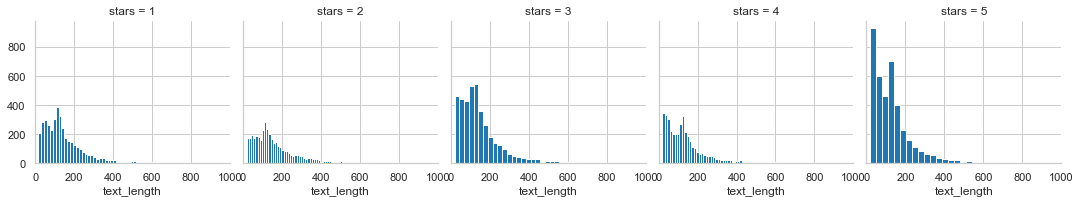

In [48]:
g = sns.FacetGrid(strat, col = 'stars')
g.map(plt.hist,'text_length', bins = 100)
plt.xlim(0,1000)

### Unimos todo el texto en una columna

In [49]:
def full_text (df):
    df['full_text'] = df[['review_title', 'review_body']].apply(' . '.join, axis = 1)

In [50]:
lista_df = [dev,test,train,strat]

for i in lista_df:
    full_text(i)

### Probamos la normalización

In [51]:
review = train['full_text'].max()
review

'🤷🏼\u200d♂️ . No note ningún efecto'

In [52]:
review = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', review)
review

'  No note ningún efecto'

In [53]:
review = nlp(review)
review

  No note ningún efecto

In [54]:
review = [w.lemma_ for w in review]
review

['  ', 'no', 'notar', 'ninguno', 'efecto']

In [55]:
stop_review = [word for word in review if word not in stoplist_combined]
stop_review

['  ', 'notar', 'efecto']

In [56]:
long_words = [word for word in stop_review if len(word)>3]
long_words

['notar', 'efecto']

In [57]:
review = " ".join(long_words)
review

'notar efecto'

### Creamos un loop para normalizar todo el texto
Esta función va a tardar bastante, cerca de 2 horas dependiendo de la pc, ya que tiene que procesar muchos datos. Con tqdm podemos visualizar el progreso. Una vez terminado el proceso, se guarda el resultado en un dataset para utilizarlo en el entrenamiento de modelos de aprendizaje y no tener que volver a correr el loop.

In [58]:
corpus = []

def text_normalizer(df):

    for rw in tqdm(df['full_text']):

        # Replace any special caracter out of the spanish language with a space
        review = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', rw)

        # Lowercase every character
        review = review.lower()

        # Apply spacy function
        review = nlp(review)

        #Lemmatize the text
        review = [w.lemma_ for w in review]

        #Remove stopwords from the text
        review = [word for word in review if word not in stoplist_combined]
        
        #Remove words with 3 characters or less
        review = [word for word in review if len(word)>3]

        #Join everything in a single string
        review = " ".join(review)

        #Append the string to the corpus
        corpus.append(review)

In [59]:
text_normalizer(strat)

100%|██████████| 20000/20000 [2:15:12<00:00,  2.47it/s]  


In [60]:
corpus[:5]

['malo calidad orible malo calidad',
 'cargar lento comprobar modelo cargador medidor amperaje buscar cable soportar cargar rápido cable parecer chino cargar lento cable caro amperio especificar superar amperio medir concienciar resumir cable normalito caro ofrecer bonito',
 'malo calidad funcionar semana entrar aguar compartimentar pilar estropear aislamiento adecuar malo producto recomendar nadar',
 'error adaptador producto llegar pedir pedir adaptador iphone plus mini llegar iphone conexión table ipad correcto saludar',
 'adecuado ideo perro grande encontrar rampa resbaloso añadir banda maderar comer escalón subir perfectamente']

### Actualizamos el dataset con los comentarios lematizados

In [61]:
strat['full_text_lemm'] = corpus

### Hacemos lo mismo con el test set

In [62]:
corpus = []
text_normalizer(test)

100%|██████████| 5000/5000 [29:09<00:00,  2.86it/s]


In [63]:
test['full_text_lemm'] = corpus

### Creamos una lista de las palabras más utilizadas para analizar las frecuencias según el ranking

In [64]:
titulares= []
for i in range(strat.shape[0]):
    titular = strat.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    titulares.append(titular)

In [65]:
titulares = list(itertools.chain(*titulares))
titulares[0:10]

['malo',
 'calidad',
 'orible',
 'malo',
 'calidad',
 'cargar',
 'lento',
 'comprobar',
 'modelo',
 'cargador']

In [66]:
freq = nltk.FreqDist(titulares)
freq

FreqDist({'calidad': 4385, 'comprar': 3485, 'producto': 3306, 'llegar': 2969, 'comer': 2911, 'preciar': 2771, 'funcionar': 2386, 'perfecto': 1888, 'nadar': 1822, 'gustar': 1794, ...})

In [67]:
df_freq = pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"])
df_freq.sort_values('Frequency',ascending=False, inplace = True)
df_freq.reset_index(drop = True, inplace=True)
df_freq.head()

,Word,Frequency
0,calidad,4385
1,comprar,3485
2,producto,3306
3,llegar,2969
4,comer,2911


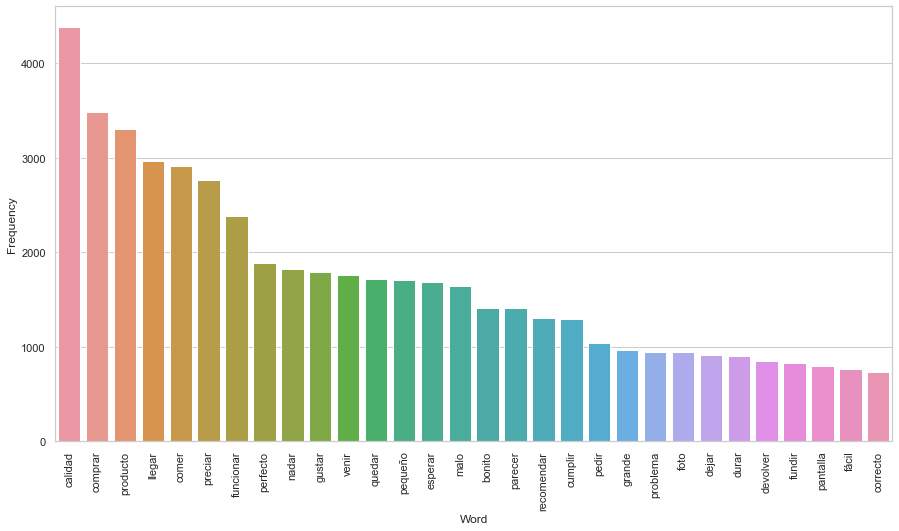

In [68]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_freq.iloc[:30].Word, y = df_freq.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Creamos un nuevo dataset con los comentarios lematizados y las estrellas

In [69]:
train_lemm = pd.concat([strat[['full_text_lemm','text_length']], strat['stars']], axis=1)
train_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
train_lemm.head()

,full_text_lemm,text_length,stars
0,malo calidad orible malo calidad,26,1
1,cargar lento comprobar modelo cargador medidor...,323,1
2,malo calidad funcionar semana entrar aguar com...,165,1
3,error adaptador producto llegar pedir pedir ad...,177,1
4,adecuado ideo perro grande encontrar rampa res...,146,3


In [70]:
test_lemm = pd.concat([test[['full_text_lemm','text_length']], test['stars']], axis=1)
test_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
test_lemm.head()

,full_text_lemm,text_length,stars
0,llegar llegar articular correo normal seguimie...,104,1
1,amazon seguir cumplir entregar mensajería horr...,37,1
2,estafar enviar decepcionar vendedor pedir lleg...,232,1
3,estafar amazon valoración producto amazon ofre...,473,1
4,pasar portar kindle interés librar probar vers...,229,1


### **WordCloud**
Vamos a mirar de manera gráfica el ranking de palabras más utilizadas. Para esto vamos a dividir en palabras "negativas" y "positivas" y aplicamos la nube de palabras.

In [71]:
pos = train_lemm[train_lemm.stars >= 4]
neg = train_lemm[train_lemm.stars <= 2]
neu = train_lemm[train_lemm.stars == 3]

### Palabras positivas

In [72]:
pos_words = []
for i in range(pos.shape[0]):
    titular = pos.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    pos_words.append(titular)

In [73]:
pos_words = list(itertools.chain(*pos_words))
pos_words[0:10]

['producto',
 'calidad',
 'moderadamente',
 'acabar',
 'entregar',
 'genial',
 'calidad',
 'plástico',
 'mejorable',
 'funcion']

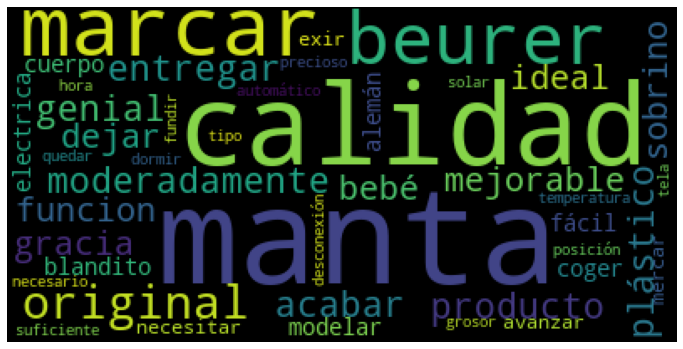

In [74]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(pos_words[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Palabras negativas

In [75]:
neg_words = []
for i in range(pos.shape[0]):
    titular = neg.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    neg_words.append(titular)

In [76]:
neg_words = list(itertools.chain(*neg_words))
neg_words[0:10]

['malo',
 'calidad',
 'orible',
 'malo',
 'calidad',
 'cargar',
 'lento',
 'comprobar',
 'modelo',
 'cargador']

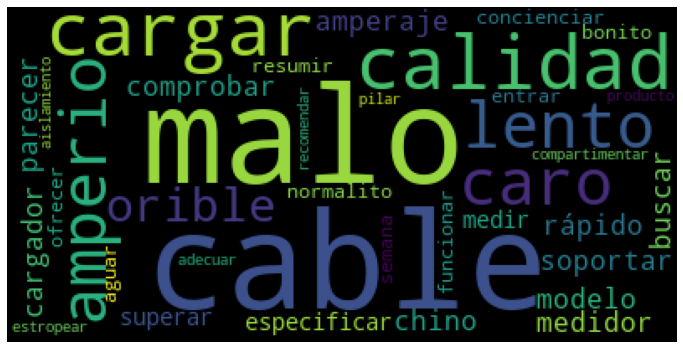

In [77]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(neg_words[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Interesante: En las palabras negativas aparece "recomendar". Seguramente escribieron "no recomendado" pero con la normalización solo nos quedamos con las palabras clave. Para el próximo trabajo veremos de mantener la verdadera intención del opinador

### Guardamos los dataset

In [80]:
train_lemm.to_csv('train_lemm.csv',index=False)
test_lemm.to_csv('test_lemm.csv',index=False)

### **Vectorización con CountVectorizer**
Bag of words. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

### Abrimos el dataset que guardamos

In [3]:
train_lemm = pd.read_csv('train_lemm.csv')
test_lemm = pd.read_csv('test_lemm.csv')

### Nos aseguramos de que no haya valores faltantes

In [4]:
train = train_lemm.dropna(axis = 0)
test = test_lemm.dropna(axis = 0)

### Creamos listas para vectorizar

In [5]:
list_train = list(train['full_text_lemm'].values)
stars_train = train['stars']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# We use only 1000 values to create vectors
max_features = 1000

# Every row will have 1000 columns
cou_vec = CountVectorizer(max_features = max_features) # stop_words = "spanish" , ngram_range=(1, 2)

In [7]:
matriz_train = cou_vec.fit_transform(list_train)

# We take the words
all_words = cou_vec.get_feature_names()

# Check the top 50 most used words
print("50 palabras mas usadas: ", all_words[0:50])

50 palabras mas usadas:  ['abajar', 'abrir', 'abrirlo', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceitar', 'aceptable', 'acerar', 'acertar', 'aconsejable', 'aconsejar', 'acoplar', 'acorde', 'activar', 'adaptador', 'adaptar', 'adecuado', 'adecuar', 'ademar', 'adherir', 'adhesivo', 'adquirir', 'adulto', 'agarrar', 'agradable', 'agradecer', 'aguantar', 'aguar', 'agujerar', 'agujero', 'ahorrar', 'aire', 'ajustar', 'alcanzar', 'alguien', 'almohada', 'altavoz', 'alto', 'altura', 'alumbrar', 'amarillo', 'amazon', 'amigo', 'amplio', 'ancho', 'andar', 'android', 'anillar']


In [8]:
xtrain = matriz_train.toarray()

In [9]:
xtrain = matriz_train.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_train_w = pd.DataFrame(xtrain, columns = header)
df_train_w

,abajar,abrir,abrirlo,absoluto,acabado,acabar,accesorio,aceitar,aceptable,acerar,...,volveria,válido,vídeo,wifi,xiaomi,zapatilla,zapato,zona,único,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Hacemos lo mismo con el test set

In [10]:
list_test = list(test['full_text_lemm'].values)
stars_test = test['stars']

In [11]:
max_features = 1000
cou_vec = CountVectorizer(max_features = max_features)
matriz_test = cou_vec.fit_transform(list_test)
all_words = cou_vec.get_feature_names()

xtest = matriz_test.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_test_w = pd.DataFrame(xtest, columns = header)

### Train set

In [12]:
text_train = pd.concat([train, df_train_w], axis=1)
text_train = text_train.dropna(axis=0)
X_train = text_train.drop(['stars','full_text_lemm'], axis = 1)
y_train = text_train['stars']

### Test set

In [13]:
text_test = pd.concat([test, df_test_w], axis=1)
text_test.dropna(axis=0,inplace=True)
X_test = text_test.drop(['stars','full_text_lemm'], axis = 1)
y_test = text_test['stars']

## **4. Modelos de predicción**

Unificamos los datos relevantes para el modelo en un solo dataframe "X". En este caso, como estamos usando una muestra del train set, no es necesario hacer un train-test split.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

### Definimos una función para la matriz de confusión

In [14]:
def confusion(ytest,y_pred):
    names = ["1","2","3","4","5"]
    cm = confusion_matrix(ytest,y_pred)
    f,ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot = True,linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### **NaiveBayes - Baseline**
Usamos este modelo como baseline para comparar con modelos avanzados.

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("acc : ", nb.score(X_test, y_test))

acc :  0.20496397117694154


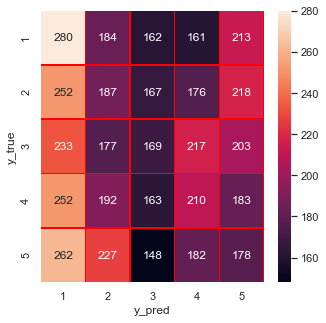

In [29]:
y_pred = nb.predict(X_test)
confusion(y_test,y_pred)

In [34]:
target_names = ["1","2","3","4","5"]
nb_report = classification_report(y_test, y_pred, output_dict=True, target_names= target_names)
nb_df = pd.DataFrame(nb_report)
nb_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.218921,0.193382,0.208900,0.221987,0.178894,0.204964,0.204417,0.204431
recall,0.280000,0.187000,0.169169,0.210000,0.178536,0.204964,0.204941,0.204964
f1-score,0.245722,0.190137,0.186947,0.215827,0.178715,0.204964,0.203470,0.203488
support,1000.000000,1000.000000,999.000000,1000.000000,997.000000,0.204964,4996.000000,4996.000000


### SVM

In [36]:
svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.20956765412329864

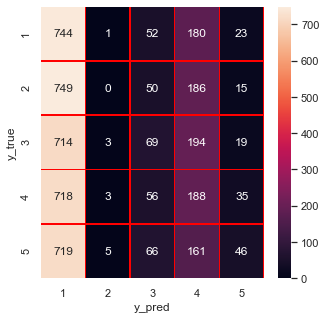

In [37]:
y_pred = svc.predict(X_test)
confusion(y_test,y_pred)

In [38]:
svc_report = classification_report(y_test, y_pred, output_dict=True, target_names= target_names)
svc_df = pd.DataFrame(svc_report)
svc_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.204171,0.0,0.235495,0.206821,0.333333,0.209568,0.195964,0.195874
recall,0.744000,0.0,0.069069,0.188000,0.046138,0.209568,0.209441,0.209568
f1-score,0.320413,0.0,0.106811,0.196962,0.081057,0.209568,0.141049,0.141092
support,1000.000000,1000.0,999.000000,1000.000000,997.000000,0.209568,4996.000000,4996.000000


### **Random Forest**

In [174]:
rf = RandomForestClassifier(random_state = 42)

### Optimización de hiperparámetros

In [175]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5,10],
               'bootstrap': [True, False]}


In [176]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, n_jobs = -1, cv = 2, verbose = 3, random_state = 42)

**ATENCIÓN: ESTE PROCESO DEMANDA MUCHOS RECURSOS Y PUEDE TARDAR EN COMPLETARSE**

In [177]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.7min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 290, 381, 472,
                                                         563, 654, 745, 836,
                                                         927, 1018, 1109,
                                                         1200]},
                   random_state=42, verbose=3)

In [178]:
rf_random.best_params_

{'n_estimators': 1109,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [179]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1109,
                       random_state=42)

In [180]:
rf_random.best_score_

0.21620134093865706

### Probamos el modelo optimizado

In [39]:
rfc = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                             min_samples_split=10, n_estimators=1109,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1109,
                       random_state=42)

In [40]:
print("acc: ", rfc.score(X_test,y_test))

acc:  0.2389911929543635


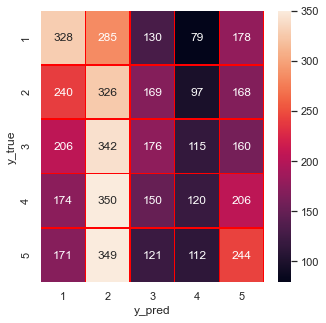

In [56]:
y_pred = rfc.predict(X_test)
confusion(y_test,y_pred)

In [57]:
rf_report = classification_report(y_test, y_pred, output_dict = True, target_names = target_names)
rf_df = pd.DataFrame(rf_report)
rf_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.293119,0.197337,0.235925,0.229446,0.255230,0.238991,0.242211,0.242205
recall,0.328000,0.326000,0.176176,0.120000,0.244734,0.238991,0.238982,0.238991
f1-score,0.309580,0.245852,0.201719,0.157584,0.249872,0.238991,0.232921,0.232917
support,1000.000000,1000.000000,999.000000,1000.000000,997.000000,0.238991,4996.000000,4996.000000


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


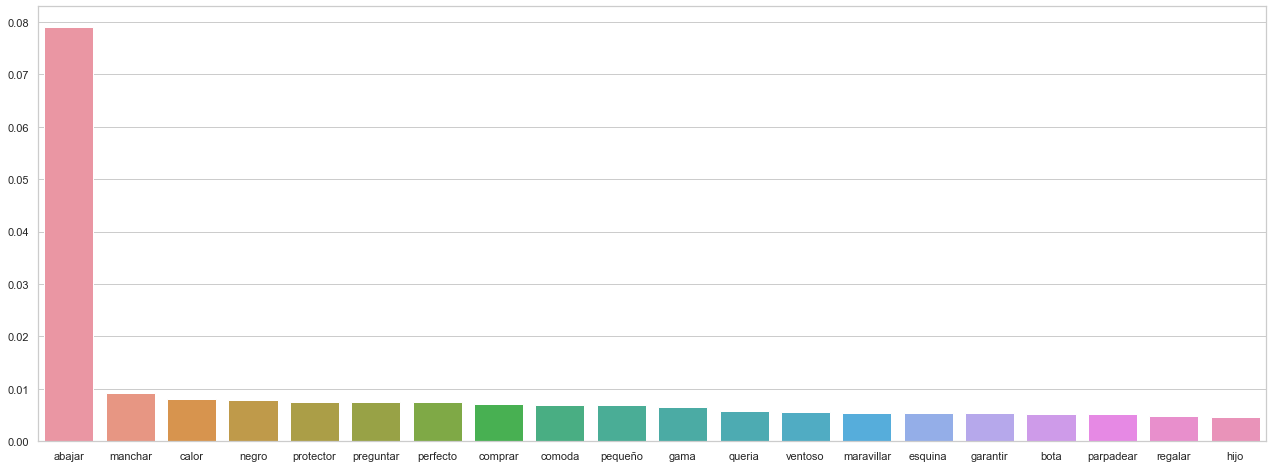

In [58]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rfc.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (22,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### Comparativa de modelos

In [52]:
comparison_acc = pd.concat([nb_df['accuracy'], svc_df['accuracy'], rf_df['accuracy']], axis = 1, names = names)
comparison_acc.columns = ['Naive_Bayes','SVM','Random Forest']
comparison_acc

,Naive_Bayes,SVM,Random Forest
precision,0.204964,0.209568,0.238991
recall,0.204964,0.209568,0.238991
f1-score,0.204964,0.209568,0.238991
support,0.204964,0.209568,0.238991


### **5. Conclusiones**
Los resultados de los modelos son similares a los del baseline. Una hipótesis es que no hay suficientes variables para que el modelo estudie, por lo que podría ser de ayuda la creación de nuevas variables que mejoren la predicción, que ha sido bastante mala. Esto se puede lograr de manera manual analizando los datos, o utilizando otro algoritmo de vectorización. Algunos elementos que fueron eliminados en el preprocesamiento, como los emojis y signos de puntuación quizás podrían aportar una mayor calidad al modelo.


### **6. Continuación de NLP con nuevas librerías**

Para la siguiente parte del trabajo, según lo que pude apreciar, podría ser interesante agregar nuevas variables con más características del texto para mejorar el rendimiento de los modelos. La cantidad de signos de exclamación, la cantidad de palabras escritas en mayúsculas, y análisis de sentimiento son los siguientes pasos a seguir para este proyecto. Algunas de las posibles propuestas para desarrollar en el TP4 son:

* Análisis de sentimientos
* Interpretación de emojis
* Conteo de signos de exclamación y palabras en mayúscula
* Word2Vec
* TF - IDF

Algo que podría ser también de gran relevancia sería unificar las opiniones por producto, creando un dataset más chico y con el promedio de estrellas por producto.
También existen algunas librerías interesantes para el procesamiento de textos que nos podrían ser de utilidad.

### Spaghetti tagger
https://github.com/alvations/spaghetti-tagger.git

### Stanford POSTagger

### Emoticon-to-text converter

### Word2Vec

### TF - IDF